In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

# 통합데이터셋 생성

### 현재
- 아동 인구수(완료)
- 아동 인구밀도(완료)

### 미래
- 신혼부부수(2020_2%_인구사항_20240623_06781.csv)
- 출생율(2020_2%_인구사항_20240623_06781.csv)

### 공급 관련 변수
- 달빛 병원수(완료)
- 인력자원 수(지역별 인력자원)
- 달빛 병원 대체 가능 시설수(심야응급의료기관)

### 경제사회변수
- 지역내 총생산

In [3]:
#아동인구수
pop = pd.read_csv('(전처리함)2020_2%_시군구별_소아청소년 인구.csv')

#아동인구밀도

In [3]:
pop['만연령'].unique()

array([11, 13, 12, 19,  7,  5,  8,  6, 14, 17, 18, 16, 15, 10,  9],
      dtype=int64)

In [4]:
pop

,가구일련번호,행정구역시도코드,행정구역시군구코드,성별코드,만연령,인구가중값,행정구역시도명,행정구역시군구명
0,1101000114,11,10,2,11,27,서울특별시,종로구
1,1101000165,11,10,1,13,22,서울특별시,종로구
2,1101000165,11,10,2,12,21,서울특별시,종로구
3,1101000165,11,10,2,12,21,서울특별시,종로구
4,1101000217,11,10,2,19,30,서울특별시,종로구
...,...,...,...,...,...,...,...,...
120589,3902013733,39,20,1,12,96,제주특별자치도,서귀포시
120590,3902013733,39,20,1,8,101,제주특별자치도,서귀포시
120591,3902013734,39,20,1,11,101,제주특별자치도,서귀포시
120592,3902013734,39,20,2,14,92,제주특별자치도,서귀포시


In [4]:
pop['가구일련번호'] = pop['가구일련번호'].astype(str)
pop['중분류'] = pop['가구일련번호'].str[:5]

# 새로운 컬럼을 기준으로 그룹화
grouped = pop.groupby('중분류')

# 각 그룹의 데이터프레임을 리스트에 담기
grouped_dfs = [group for name, group in grouped]

# 각 그룹의 데이터프레임을 병합
pop_merged = pd.concat(grouped_dfs, ignore_index=True)

            가구일련번호  행정구역시도코드  행정구역시군구코드  성별코드  만연령  인구가중값  행정구역시도명 행정구역시군구명  \
0       1101000114        11         10     2   11     27    서울특별시      종로구   
1       1101000165        11         10     1   13     22    서울특별시      종로구   
2       1101000165        11         10     2   12     21    서울특별시      종로구   
3       1101000165        11         10     2   12     21    서울특별시      종로구   
4       1101000217        11         10     2   19     30    서울특별시      종로구   
...            ...       ...        ...   ...  ...    ...      ...      ...   
120589  3902013733        39         20     1   12     96  제주특별자치도     서귀포시   
120590  3902013733        39         20     1    8    101  제주특별자치도     서귀포시   
120591  3902013734        39         20     1   11    101  제주특별자치도     서귀포시   
120592  3902013734        39         20     2   14     92  제주특별자치도     서귀포시   
120593  3902013744        39         20     1   13     64  제주특별자치도     서귀포시   

          중분류  
0       11010  
1       11010  
2  

In [5]:
pop_merged

,가구일련번호,행정구역시도코드,행정구역시군구코드,성별코드,만연령,인구가중값,행정구역시도명,행정구역시군구명,중분류
0,1101000114,11,10,2,11,27,서울특별시,종로구,11010
1,1101000165,11,10,1,13,22,서울특별시,종로구,11010
2,1101000165,11,10,2,12,21,서울특별시,종로구,11010
3,1101000165,11,10,2,12,21,서울특별시,종로구,11010
4,1101000217,11,10,2,19,30,서울특별시,종로구,11010
...,...,...,...,...,...,...,...,...,...
120589,3902013733,39,20,1,12,96,제주특별자치도,서귀포시,39020
120590,3902013733,39,20,1,8,101,제주특별자치도,서귀포시,39020
120591,3902013734,39,20,1,11,101,제주특별자치도,서귀포시,39020
120592,3902013734,39,20,2,14,92,제주특별자치도,서귀포시,39020


# 시군구별 아동 인구수 (pop_code_count)

In [20]:
# '중분류'를 기준으로 그룹화하고 count 계산
pop_code_count = pop.groupby('중분류').size().reset_index(name='아동인구수')

# '중분류'별로 '행정구역시도명'과 '행정구역시군구명'을 가져오기 위해 첫 번째 행 선택
region_info = pop.drop_duplicates(subset='중분류')[['중분류', '행정구역시도명', '행정구역시군구명']]

# '중분류'를 기준으로 left join 수행
pop_code_count = pop_code_count.merge(region_info, on='중분류', how='left')

# 결과 출력
print(pop_code_count)

       중분류  아동인구수  행정구역시도명 행정구역시군구명
0    11010    431    서울특별시      종로구
1    11020    300    서울특별시       중구
2    11030    441    서울특별시      용산구
3    11040    406    서울특별시      성동구
4    11050    552    서울특별시      광진구
..     ...    ...      ...      ...
245  38380    153     경상남도      함양군
246  38390    141     경상남도      거창군
247  38400    149     경상남도      합천군
248  39010    949  제주특별자치도      제주시
249  39020    383  제주특별자치도     서귀포시

[250 rows x 4 columns]


# 아동인구수 상위권

In [21]:
pop_sort = pop_code_count.sort_values('아동인구수', ascending=False)

In [22]:
pop_sort.head(10)

,중분류,아동인구수,행정구역시도명,행정구역시군구명
85,31050,1801,경기도,부천시
109,31240,1785,경기도,화성시
81,31023,1736,경기도,분당구
96,31130,1472,경기도,남양주시
22,11230,1405,서울특별시,강남구
47,22070,1164,대구광역시,달서구
104,31193,1152,경기도,수지구
103,31192,1152,경기도,기흥구
55,23080,1143,인천광역시,서구
45,22050,1137,대구광역시,북구


# 달빛병원수 (moon_code)

In [9]:
moon = pd.read_csv('달빛병원리스트.csv')
moon.reset_index(drop=True, inplace=True)
moon.head(5)

,Unnamed: 0,병원명,주소
0,0,의료법인우리아이들의료재단우리아이들병원,"서울특별시 구로구 새말로 15, 2~9층 (구로동, 삼전솔하임)"
1,1,24시열린의원,"서울특별시 광진구 능동로 90, 3층 (자양동, 더클래식500)"
2,2,연세곰돌이소아청소년과의원,"서울특별시 서초구 방배로 226, 넥센강남타워 3층 (방배동)"
3,3,연세의원,"서울특별시 강서구 화곡로 197, 1,2층 (화곡동)"
4,4,미즈아이프라자산부인과의원,"서울특별시 노원구 동일로 1669, 수락프라자 (상계동)"


In [10]:
moon= moon.iloc[:,1:]

In [11]:
# 주소 데이터를 시도와 시군구로 구분

moon['시도'] = moon['주소'].apply(lambda x: x.split(' ', 1)[0])
moon['시군구'] = moon['주소'].apply(lambda x: x.split(' ', 2)[1])


# 결과 출력
print(moon[['시도', '시군구']])

         시도   시군구
0     서울특별시   구로구
1     서울특별시   광진구
2     서울특별시   서초구
3     서울특별시   강서구
4     서울특별시   노원구
..      ...   ...
85     경상남도   창원시
86     경상남도   창원시
87  제주특별자치도  서귀포시
88  제주특별자치도   제주시
89  제주특별자치도   제주시

[90 rows x 2 columns]


In [12]:
moon

,병원명,주소,시도,시군구
0,의료법인우리아이들의료재단우리아이들병원,"서울특별시 구로구 새말로 15, 2~9층 (구로동, 삼전솔하임)",서울특별시,구로구
1,24시열린의원,"서울특별시 광진구 능동로 90, 3층 (자양동, 더클래식500)",서울특별시,광진구
2,연세곰돌이소아청소년과의원,"서울특별시 서초구 방배로 226, 넥센강남타워 3층 (방배동)",서울특별시,서초구
3,연세의원,"서울특별시 강서구 화곡로 197, 1,2층 (화곡동)",서울특별시,강서구
4,미즈아이프라자산부인과의원,"서울특별시 노원구 동일로 1669, 수락프라자 (상계동)",서울특별시,노원구
...,...,...,...,...
85,서울패밀리병원,"경상남도 창원시 성산구 마디미서로 54, 서울아동병원(2,7,8,9,11,12층) ...",경상남도,창원시
86,양덕서울아동병원,경상남도 창원시 마산회원구 양덕로 190 (석전동),경상남도,창원시
87,우리들소아과의원,"제주특별자치도 서귀포시 중정로 70, (서귀동)",제주특별자치도,서귀포시
88,탑동365일의원,"제주특별자치도 제주시 탑동로 24 (삼도이동,2층)",제주특별자치도,제주시


행정구역분류코드와 병합

In [14]:
dong = pd.read_excel('한국행정구역분류_행정동코드(7자리)_20210701기준.xlsx', sheet_name='1. 총괄표(현행)', header=2, index_col=None)

In [15]:
dong = dong.drop(columns=[dong.columns[0]])
dong.fillna(0, inplace=True)

In [16]:
# '중분류' 열을 문자열로 변환하면서 소수점 제거
dong['중분류'] = dong['중분류'].apply(lambda x: str(int(x)) if pd.notnull(x) else '')

# 결과 출력
print(dong.head())

    대분류     시도    중분류  시군구        소분류  읍면동           영문 표기  한자 표기
0  11.0  서울특별시      0    0        0.0    0           Seoul  서울特別市
1  11.0  서울특별시  11010  종로구        0.0    0       Jongno-gu    鐘路區
2  11.0  서울특별시  11010  종로구  1101053.0  사직동      Sajik-dong    社稷洞
3  11.0  서울특별시  11010  종로구  1101054.0  삼청동  Samcheong-dong    三淸洞
4  11.0  서울특별시  11010  종로구  1101055.0  부암동       Buam-dong    付岩洞


In [18]:
# 중복 제거 후 merge 수행
dong_unique = dong.drop_duplicates(subset=['시도', '시군구'])
moon_code = pd.merge(moon, dong_unique[['시도', '시군구', '중분류']], on=['시도', '시군구'], how='left')

# NA 값을 0으로 대체 (원하는 값으로 대체 가능)
moon_code['중분류'] = moon_code['중분류'].fillna(0)

# 결과 출력
print(moon_code.head(4))

                    병원명                                   주소     시도  시군구  \
0  의료법인우리아이들의료재단우리아이들병원  서울특별시 구로구 새말로 15, 2~9층 (구로동, 삼전솔하임)  서울특별시  구로구   
1               24시열린의원  서울특별시 광진구 능동로 90, 3층 (자양동, 더클래식500)  서울특별시  광진구   
2         연세곰돌이소아청소년과의원   서울특별시 서초구 방배로 226, 넥센강남타워 3층 (방배동)  서울특별시  서초구   
3                  연세의원        서울특별시 강서구 화곡로 197, 1,2층 (화곡동)  서울특별시  강서구   

     중분류  
0  11170  
1  11050  
2  11220  
3  11160  


# 아동인구수(pop) 달빛병원수(moon) 병합

In [25]:
# '중분류'별 '병원명' 개수 세기
hospital_count = moon_code.groupby('중분류').size().reset_index(name='병원개수')

# '중분류'를 기준으로 left join 수행
pop_moon = pop_code_count[['중분류', '행정구역시도명', '행정구역시군구명','아동인구수']].merge(hospital_count, on='중분류', how='left')

In [24]:
pop_moon

,중분류,행정구역시도명,행정구역시군구명,아동인구수,병원개수
0,11010,서울특별시,종로구,431,NaN
1,11020,서울특별시,중구,300,NaN
2,11030,서울특별시,용산구,441,NaN
3,11040,서울특별시,성동구,406,NaN
4,11050,서울특별시,광진구,552,1.0
...,...,...,...,...,...
245,38380,경상남도,함양군,153,NaN
246,38390,경상남도,거창군,141,NaN
247,38400,경상남도,합천군,149,NaN
248,39010,제주특별자치도,제주시,949,2.0


In [27]:
pop_moon=pop_moon.fillna(0)

       중분류 행정구역시도명 행정구역시군구명  아동인구수  병원개수
55   23080   인천광역시       서구   1143   4.0
82   31030     경기도     의정부시    864   3.0
108  31230     경기도      김포시    982   3.0
67   25040   대전광역시      유성구    862   2.0
64   25010   대전광역시       동구    488   2.0
..     ...     ...      ...    ...   ...
113  31280     경기도      여주시    417   0.0
114  31350     경기도      연천군    160   0.0
115  31370     경기도      가평군    155   0.0
116  31380     경기도      양평군    231   0.0
125  32320     강원도      횡성군    137   0.0

[250 rows x 5 columns]


In [29]:
pop_moon['인구 천명당 병원수'] = (pop_moon['병원개수'] / pop_moon['아동인구수'])
pd.set_option('display.float_format', '{:.4f}'.format)

print(pop_moon)

       중분류  행정구역시도명 행정구역시군구명  아동인구수   병원개수  인구 천명당 병원수
0    11010    서울특별시      종로구    431 0.0000      0.0000
1    11020    서울특별시       중구    300 0.0000      0.0000
2    11030    서울특별시      용산구    441 0.0000      0.0000
3    11040    서울특별시      성동구    406 0.0000      0.0000
4    11050    서울특별시      광진구    552 1.0000      0.0018
..     ...      ...      ...    ...    ...         ...
245  38380     경상남도      함양군    153 0.0000      0.0000
246  38390     경상남도      거창군    141 0.0000      0.0000
247  38400     경상남도      합천군    149 0.0000      0.0000
248  39010  제주특별자치도      제주시    949 2.0000      0.0021
249  39020  제주특별자치도     서귀포시    383 1.0000      0.0026

[250 rows x 6 columns]


In [31]:
# 인구 천명당 병원수를 기준으로 sort 
pop_moon_sort_ratio = pop_moon.sort_values(by='인구 천명당 병원수', ascending=False)

In [32]:
pop_moon_sort_ratio

,중분류,행정구역시도명,행정구역시군구명,아동인구수,병원개수,인구 천명당 병원수
28,21040,부산광역시,영도구,233,1.0000,0.0043
64,25010,대전광역시,동구,488,2.0000,0.0041
151,34020,충청남도,공주시,273,1.0000,0.0037
182,36030,전라남도,순천시,561,2.0000,0.0036
55,23080,인천광역시,서구,1143,4.0000,0.0035
...,...,...,...,...,...,...
113,31280,경기도,여주시,417,0.0000,0.0000
114,31350,경기도,연천군,160,0.0000,0.0000
115,31370,경기도,가평군,155,0.0000,0.0000
116,31380,경기도,양평군,231,0.0000,0.0000


In [33]:
# 병원개수를 기준으로 sort
pop_moon_sort_count = pop_moon.sort_values(by='병원개수', ascending=False)

# 결과 출력
print(pop_moon_sort_count)

       중분류 행정구역시도명 행정구역시군구명  아동인구수   병원개수  인구 천명당 병원수
55   23080   인천광역시       서구   1143 4.0000      0.0035
82   31030     경기도     의정부시    864 3.0000      0.0035
108  31230     경기도      김포시    982 3.0000      0.0031
67   25040   대전광역시      유성구    862 2.0000      0.0023
64   25010   대전광역시       동구    488 2.0000      0.0041
..     ...     ...      ...    ...    ...         ...
113  31280     경기도      여주시    417 0.0000      0.0000
114  31350     경기도      연천군    160 0.0000      0.0000
115  31370     경기도      가평군    155 0.0000      0.0000
116  31380     경기도      양평군    231 0.0000      0.0000
125  32320     강원도      횡성군    137 0.0000      0.0000

[250 rows x 6 columns]


In [34]:
pop_moon_sort_pop = pop_moon.sort_values('아동인구수', ascending=False)

In [35]:
pop_moon_sort_pop.head(20)

,중분류,행정구역시도명,행정구역시군구명,아동인구수,병원개수,인구 천명당 병원수
85,31050,경기도,부천시,1801,1.0000,0.0006
109,31240,경기도,화성시,1785,2.0000,0.0011
81,31023,경기도,분당구,1736,0.0000,0.0000
96,31130,경기도,남양주시,1472,1.0000,0.0007
22,11230,서울특별시,강남구,1405,2.0000,0.0014
47,22070,대구광역시,달서구,1164,0.0000,0.0000
104,31193,경기도,수지구,1152,0.0000,0.0000
103,31192,경기도,기흥구,1152,0.0000,0.0000
55,23080,인천광역시,서구,1143,4.0000,0.0035
45,22050,대구광역시,북구,1137,0.0000,0.0000


In [113]:
#pop_moon_sort_pop.to_csv('')

# 24시간 상주 응급의료진 수(doctor)

In [56]:
#24시간 상주 응급의료진 수

doctor_data = {
    "행정구역시도명": ["전체", "서울특별시", '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', "경상남도", '제주특별자치도'],
    "24시간상주응급의료진수": [392, 49, 27, 17, 18, 20, 9, 7, 2, 69, 22, 14, 16, 20, 31, 30, 35, 6]
}

doctor = pd.DataFrame(doctor_data)

In [57]:
doctor

,행정구역시도명,24시간상주응급의료진수
0,전체,392
1,서울특별시,49
2,부산광역시,27
3,대구광역시,17
4,인천광역시,18
5,광주광역시,20
6,대전광역시,9
7,울산광역시,7
8,세종특별자치시,2
9,경기도,69


In [43]:
data = {
    "행정구역시도명": ["전체", "서울특별시", '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', "경상남도", '제주특별자치도', '미상'],
    "전체": [5061764, 990391, 211432, 174313, 361493, 122758, 128558, 69801, 34530, 1314572, 172999, 146524, 270461, 234929, 134443, 273046, 225415, 119267, 76832],
    "00-03시이전": [460623, 92642, 19238, 15336, 34563, 11369, 12449, 6129, 3191, 122331, 14427, 12899, 23673, 20176, 11030, 22696, 20392, 10757, 7325],
    "03-06시이전": [297746, 61096, 12978, 10126, 22193, 6894, 7813, 3972, 2094, 78352, 9185, 8268, 15243, 12703, 7132, 14645, 13179, 7127, 4746],
    "06-09시이전": [412593, 84446, 17934, 13818, 29510, 9347, 10710, 5637, 2838, 104669, 14413, 12526, 21067, 18291, 10885, 21830, 18441, 10403, 5828],
    "09-12시이전": [785744, 156128, 33230, 28528, 55649, 16207, 21019, 10473, 5321, 201360, 29569, 24554, 39882, 36194, 20751, 43068, 34025, 18896, 10890],
    "12-15시이전": [734429, 144070, 30857, 26296, 50747, 16405, 18317, 9791, 4706, 188785, 27717, 22176, 37732, 34097, 20198, 41336, 33011, 17132, 11056],
    "15-18시이전": [753594, 147284, 31239, 26442, 52844, 18458, 18842, 10868, 4892, 192263, 26787, 21889, 39751, 35546, 21283, 42577, 33653, 17571, 11405],
    "18-21시이전": [845309, 155516, 34110, 27891, 59247, 23913, 20055, 12407, 5786, 219217, 27680, 23373, 51005, 42390, 23812, 47119, 38360, 19873, 13555],
    "21-24시이전": [771726, 149209, 31846, 25876, 56740, 20165, 19353, 10524, 5702, 207595, 23221, 20839, 42108, 35532, 19352, 39775, 34354, 17508, 12027]
}

df_time = pd.DataFrame(data)
print(df_time)

    행정구역시도명       전체  00-03시이전  03-06시이전  06-09시이전  09-12시이전  12-15시이전  \
0        전체  5061764    460623    297746    412593    785744    734429   
1     서울특별시   990391     92642     61096     84446    156128    144070   
2     부산광역시   211432     19238     12978     17934     33230     30857   
3     대구광역시   174313     15336     10126     13818     28528     26296   
4     인천광역시   361493     34563     22193     29510     55649     50747   
5     광주광역시   122758     11369      6894      9347     16207     16405   
6     대전광역시   128558     12449      7813     10710     21019     18317   
7     울산광역시    69801      6129      3972      5637     10473      9791   
8   세종특별자치시    34530      3191      2094      2838      5321      4706   
9       경기도  1314572    122331     78352    104669    201360    188785   
10      강원도   172999     14427      9185     14413     29569     27717   
11     충청북도   146524     12899      8268     12526     24554     22176   
12     충청남도   270461     23673     152

In [87]:
df_time.columns

Index(['분류', '전체', '00-03시이전', '03-06시이전', '06-09시이전', '09-12시이전', '12-15시이전',
       '15-18시이전', '18-21시이전', '21-24시이전'],
      dtype='object')

In [44]:
columns = ['행정구역시도명', '00-03시이전', '03-06시이전', '06-09시이전', '18-21시이전', '21-24시이전']

time = df_time[columns]

In [45]:
time

,행정구역시도명,00-03시이전,03-06시이전,06-09시이전,18-21시이전,21-24시이전
0,전체,460623,297746,412593,845309,771726
1,서울특별시,92642,61096,84446,155516,149209
2,부산광역시,19238,12978,17934,34110,31846
3,대구광역시,15336,10126,13818,27891,25876
4,인천광역시,34563,22193,29510,59247,56740
5,광주광역시,11369,6894,9347,23913,20165
6,대전광역시,12449,7813,10710,20055,19353
7,울산광역시,6129,3972,5637,12407,10524
8,세종특별자치시,3191,2094,2838,5786,5702
9,경기도,122331,78352,104669,219217,207595


In [46]:
# '분류' 열 제외한 나머지 열들 선택
time_columns = ['00-03시이전', '03-06시이전', '06-09시이전', '18-21시이전', '21-24시이전']

# 행별로 합산하여 새로운 열 추가
time['시도별연간심야의료이용량'] = time[time_columns].sum(axis=1)

time

C:\Users\PnM_Media_3\AppData\Local\Temp\ipykernel_46776\3541334502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['시도별연간심야의료이용량'] = time[time_columns].sum(axis=1)


,행정구역시도명,00-03시이전,03-06시이전,06-09시이전,18-21시이전,21-24시이전,시도별연간심야의료이용량
0,전체,460623,297746,412593,845309,771726,2787997
1,서울특별시,92642,61096,84446,155516,149209,542909
2,부산광역시,19238,12978,17934,34110,31846,116106
3,대구광역시,15336,10126,13818,27891,25876,93047
4,인천광역시,34563,22193,29510,59247,56740,202253
5,광주광역시,11369,6894,9347,23913,20165,71688
6,대전광역시,12449,7813,10710,20055,19353,70380
7,울산광역시,6129,3972,5637,12407,10524,38669
8,세종특별자치시,3191,2094,2838,5786,5702,19611
9,경기도,122331,78352,104669,219217,207595,732164


In [110]:
time

,분류,00-03시이전,03-06시이전,06-09시이전,18-21시이전,21-24시이전,연간심야의료이용량
0,전체,460623,297746,412593,845309,771726,2787997
1,서울특별시,92642,61096,84446,155516,149209,542909
2,부산광역시,19238,12978,17934,34110,31846,116106
3,대구광역시,15336,10126,13818,27891,25876,93047
4,인천광역시,34563,22193,29510,59247,56740,202253
5,광주광역시,11369,6894,9347,23913,20165,71688
6,대전광역시,12449,7813,10710,20055,19353,70380
7,울산광역시,6129,3972,5637,12407,10524,38669
8,세종특별자치시,3191,2094,2838,5786,5702,19611
9,경기도,122331,78352,104669,219217,207595,732164


In [58]:
# 심야의료이용량 병합
time_total = time[['행정구역시도명','시도별연간심야의료이용량']]

# 병합
pop_moon_time = pd.merge(pop_moon, time_total, left_on='행정구역시도명', right_on='행정구역시도명')

# 결과 출력
print(pop_moon_time)

       중분류  행정구역시도명 행정구역시군구명  아동인구수   병원개수  인구 천명당 병원수  시도별연간심야의료이용량
0    11010    서울특별시      종로구    431 0.0000      0.0000        542909
1    11020    서울특별시       중구    300 0.0000      0.0000        542909
2    11030    서울특별시      용산구    441 0.0000      0.0000        542909
3    11040    서울특별시      성동구    406 0.0000      0.0000        542909
4    11050    서울특별시      광진구    552 1.0000      0.0018        542909
..     ...      ...      ...    ...    ...         ...           ...
245  38380     경상남도      함양군    153 0.0000      0.0000        124726
246  38390     경상남도      거창군    141 0.0000      0.0000        124726
247  38400     경상남도      합천군    149 0.0000      0.0000        124726
248  39010  제주특별자치도      제주시    949 2.0000      0.0021         65668
249  39020  제주특별자치도     서귀포시    383 1.0000      0.0026         65668

[250 rows x 7 columns]


In [59]:
# 의료진수 병합
pop_moon_time_doctor = pd.merge(pop_moon_time, doctor, left_on='행정구역시도명', right_on='행정구역시도명')

# 결과 출력
print(pop_moon_time_doctor)

       중분류  행정구역시도명 행정구역시군구명  아동인구수   병원개수  인구 천명당 병원수  시도별연간심야의료이용량  \
0    11010    서울특별시      종로구    431 0.0000      0.0000        542909   
1    11020    서울특별시       중구    300 0.0000      0.0000        542909   
2    11030    서울특별시      용산구    441 0.0000      0.0000        542909   
3    11040    서울특별시      성동구    406 0.0000      0.0000        542909   
4    11050    서울특별시      광진구    552 1.0000      0.0018        542909   
..     ...      ...      ...    ...    ...         ...           ...   
245  38380     경상남도      함양군    153 0.0000      0.0000        124726   
246  38390     경상남도      거창군    141 0.0000      0.0000        124726   
247  38400     경상남도      합천군    149 0.0000      0.0000        124726   
248  39010  제주특별자치도      제주시    949 2.0000      0.0021         65668   
249  39020  제주특별자치도     서귀포시    383 1.0000      0.0026         65668   

     24시간상주응급의료진수  
0              49  
1              49  
2              49  
3              49  
4              49  
..            .

In [60]:
pop_moon_time_doctor

,중분류,행정구역시도명,행정구역시군구명,아동인구수,병원개수,인구 천명당 병원수,시도별연간심야의료이용량,24시간상주응급의료진수
0,11010,서울특별시,종로구,431,0.0000,0.0000,542909,49
1,11020,서울특별시,중구,300,0.0000,0.0000,542909,49
2,11030,서울특별시,용산구,441,0.0000,0.0000,542909,49
3,11040,서울특별시,성동구,406,0.0000,0.0000,542909,49
4,11050,서울특별시,광진구,552,1.0000,0.0018,542909,49
...,...,...,...,...,...,...,...,...
245,38380,경상남도,함양군,153,0.0000,0.0000,124726,35
246,38390,경상남도,거창군,141,0.0000,0.0000,124726,35
247,38400,경상남도,합천군,149,0.0000,0.0000,124726,35
248,39010,제주특별자치도,제주시,949,2.0000,0.0021,65668,6


In [62]:
pop_moon_time_doctor.columns

Index(['중분류', '행정구역시도명', '행정구역시군구명', '아동인구수', '병원개수', '인구 천명당 병원수',
       '시도별연간심야의료이용량', '24시간상주응급의료진수'],
      dtype='object')

# 변수 분석

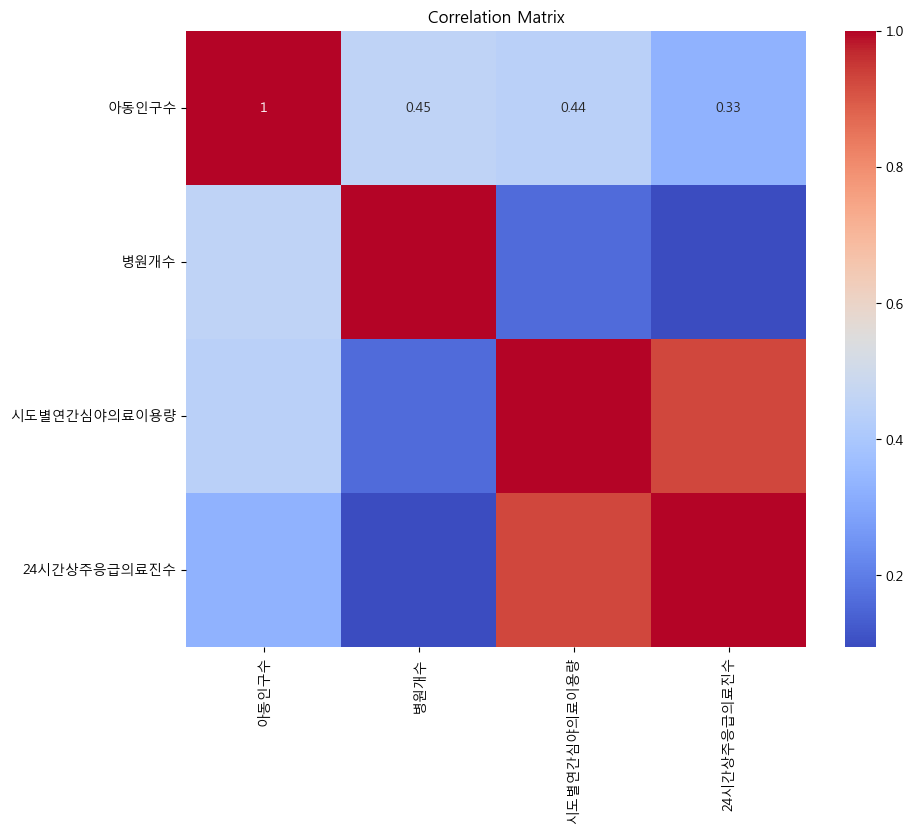

Explained Variance Ratio of each PCA component:
[9.99999999e-01 7.94680392e-10 5.85207851e-12]

PCA Components and their weights:
      병원개수  시도별연간심야의료이용량  24시간상주응급의료진수
PC1 0.0000        1.0000        0.0001
PC2 0.0131        0.0001       -0.9999
PC3 0.9999       -0.0000        0.0131

Final Dataframe with Weighted Score:
   아동인구수   병원개수  시도별연간심야의료이용량  24시간상주응급의료진수  Weighted_Score
0    431 0.0000        542909            49     283235.9002
1    300 0.0000        542909            49     283235.9002
2    441 0.0000        542909            49     283235.9002
3    406 0.0000        542909            49     283235.9002
4    552 1.0000        542909            49     283235.9002


In [64]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

#한글깨짐방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 사용 데이터
data = pop_moon_time_doctor[['아동인구수', '병원개수', '시도별연간심야의료이용량', '24시간상주응급의료진수']].copy()

# 상관 분석
correlation_matrix = data.corr()

# 상관 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 상관계수 기반으로 변수 선택
# 예를 들어, 상관계수가 0.8 이상인 변수 선택
threshold = 0.8
high_corr_var = [column for column in correlation_matrix.columns if any(correlation_matrix[column] > threshold) and column != correlation_matrix.columns[0]]

# 주성분 분석 (PCA)
pca = PCA(n_components=len(high_corr_var))
principal_components = pca.fit_transform(data[high_corr_var])

# 주성분 분석 결과 확인
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(len(high_corr_var))])
explained_variance = pca.explained_variance_ratio_

# 주성분 가중치 확인
components = pd.DataFrame(pca.components_, columns=high_corr_var, index=[f'PC{i+1}' for i in range(len(high_corr_var))])

print("Explained Variance Ratio of each PCA component:")
print(explained_variance)

print("\nPCA Components and their weights:")
print(components)

# 선택된 변수와 주성분 가중치 기반으로 새로운 데이터셋 생성
weight = explained_variance / sum(explained_variance)
weighted_data = np.dot(principal_components, weight)

weighted_df = pd.DataFrame(data=weighted_data, columns=['Weighted_Score'])
final_df = pd.concat([data, weighted_df], axis=1)

print("\nFinal Dataframe with Weighted Score:")
print(final_df.head())

In [65]:
final_df

,아동인구수,병원개수,시도별연간심야의료이용량,24시간상주응급의료진수,Weighted_Score
0,431,0.0000,542909,49,283235.9002
1,300,0.0000,542909,49,283235.9002
2,441,0.0000,542909,49,283235.9002
3,406,0.0000,542909,49,283235.9002
4,552,1.0000,542909,49,283235.9002
...,...,...,...,...,...
245,153,0.0000,124726,35,-134947.0995
246,141,0.0000,124726,35,-134947.0995
247,149,0.0000,124726,35,-134947.0995
248,949,2.0000,65668,6,-194005.1013


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 사용 데이터
data = pop_moon_time_doctor[['아동인구수', '병원개수', '시도별연간심야의료이용량', '24시간상주응급의료진수']].copy()

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# KMeans 클러스터링
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

# 클러스터 결과를 데이터프레임에 추가
data['KMeans_Cluster'] = kmeans_labels

# 결과 출력
print(data)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


     아동인구수   병원개수  시도별연간심야의료이용량  24시간상주응급의료진수  KMeans_Cluster
0      431 0.0000        542909            49               1
1      300 0.0000        542909            49               1
2      441 0.0000        542909            49               1
3      406 0.0000        542909            49               1
4      552 1.0000        542909            49               1
..     ...    ...           ...           ...             ...
245    153 0.0000        124726            35               0
246    141 0.0000        124726            35               0
247    149 0.0000        124726            35               0
248    949 2.0000         65668             6               2
249    383 1.0000         65668             6               0

[250 rows x 5 columns]


In [186]:
!pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable


In [67]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3, random_state=0)
kmedoids_labels = kmedoids.fit_predict(data_scaled)
data['KMedoids_Cluster'] = kmedoids_labels

In [69]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_labels = gmm.fit_predict(data_scaled)
data['GMM_Cluster'] = gmm_labels

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
from scipy.cluster.hierarchy import linkage, fcluster

linked = linkage(data_scaled, 'ward')
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')
data['Hierarchical_Cluster'] = hierarchical_labels

In [71]:
data

,아동인구수,병원개수,시도별연간심야의료이용량,24시간상주응급의료진수,KMeans_Cluster,KMedoids_Cluster,GMM_Cluster,Hierarchical_Cluster
0,431,0.0000,542909,49,1,0,1,1
1,300,0.0000,542909,49,1,0,1,1
2,441,0.0000,542909,49,1,0,1,1
3,406,0.0000,542909,49,1,0,1,1
4,552,1.0000,542909,49,1,2,1,1
...,...,...,...,...,...,...,...,...
245,153,0.0000,124726,35,0,1,0,2
246,141,0.0000,124726,35,0,1,0,2
247,149,0.0000,124726,35,0,1,0,2
248,949,2.0000,65668,6,2,2,2,3


In [201]:
from sklearn.metrics import silhouette_score
df = pd.DataFrame(data)

# 클러스터링 결과 비교 (예: 실루엣 점수)
silhouette_kmeans = silhouette_score(df[['아동인구수', '시도별연간심야의료이용량']], df['KMeans_Cluster'])
silhouette_kmedoids = silhouette_score(df[['아동인구수', '시도별연간심야의료이용량']], df['KMedoids_Cluster'])

print(f"KMeans 실루엣 점수: {silhouette_kmeans}")
print(f"KMedoids 실루엣 점수: {silhouette_kmedoids}")

# 공통 클러스터가 있는 행 찾기
df['common_cluster'] = (df['KMeans_Cluster'] == df['KMedoids_Cluster'])

# 공통 클러스터가 있는 행 출력
common_clusters = df[df['common_cluster']]
print(common_clusters)

KMeans 실루엣 점수: 0.6596387225202086
KMedoids 실루엣 점수: -0.038887089564912214
     아동인구수   병원개수  시도별연간심야의료이용량  시도별24시간전담의사수  KMeans_Cluster  \
2     1736 0.0000        732164            69               2   
4     1152 0.0000        732164            69               2   
5     1152 0.0000        732164            69               2   
6     1029 0.0000        732164            69               2   
9      933 1.0000        732164            69               2   
..     ...    ...           ...           ...             ...   
200    290 0.0000         88926            22               0   
218    410 1.0000         77905            14               0   
219    369 0.0000         77905            14               0   
231    479 1.0000         72211            31               0   
232    346 0.0000         72211            31               0   

     KMedoids_Cluster  GMM_Cluster  Hierarchical_Cluster  common_cluster  
2                   2            2                     1            Tru

In [72]:
df = pd.DataFrame(data)

# 모든 클러스터링 방법이 동일한 클러스터에 할당된 행 찾기
df['common_cluster'] = (df['KMeans_Cluster'] == df['KMedoids_Cluster'])

# 공통 클러스터가 있는 행 출력
common_clusters = df[df['common_cluster']]
print(common_clusters)

     아동인구수   병원개수  시도별연간심야의료이용량  24시간상주응급의료진수  KMeans_Cluster  \
7      763 1.0000        542909            49               2   
10    1020 1.0000        542909            49               2   
14     933 1.0000        542909            49               2   
15     906 1.0000        542909            49               2   
21     981 1.0000        542909            49               2   
22    1405 2.0000        542909            49               2   
23    1067 2.0000        542909            49               2   
26     273 0.0000        116106            27               0   
33    1137 1.0000        116106            27               2   
35     460 0.0000        116106            27               0   
36     390 1.0000        116106            27               0   
38     314 0.0000        116106            27               0   
39     425 0.0000        116106            27               0   
43     366 0.0000         93047            17               0   
49     473 1.0000        

# 특이변수 랭킹 및 가중치 데이터 입력

In [108]:
# 특이변수 랭킹
ranked_data = common_clusters.rank(ascending=False)

# 가중치를 줄 데이터
pop_count = pop_moon_time_doctor['아동인구수']

# 가중치 적용
weighted_rank = ranked_data.mul(pop_count, axis=0)

# 행정동별 평균 RANK 계산
weighted_rank['Average_Rank'] = weighted_rank.mean(axis=1)

# 상위 10개의 우선 시군구 도출
top_10 = weighted_rank.sort_values('Average_Rank', ascending=False).head(10)

In [109]:
top_10

,아동인구수,병원개수,시도별연간심야의료이용량,24시간상주응급의료진수,KMeans_Cluster,KMedoids_Cluster,GMM_Cluster,Hierarchical_Cluster,common_cluster,Average_Rank
85,1801.0000,41423.0000,7204.0000,7204.0000,23413.0000,23413.0000,44124.5000,95453.0000,54930.5000,33218.4444
109,3570.0000,16065.0000,7140.0000,7140.0000,23205.0000,23205.0000,43732.5000,94605.0000,54442.5000,30345.0000
96,4416.0000,33856.0000,5888.0000,5888.0000,19136.0000,19136.0000,36064.0000,78016.0000,44896.0000,27477.3333
22,5620.0000,12645.0000,15455.0000,15455.0000,18265.0000,18265.0000,34422.5000,74465.0000,42852.5000,26382.7778
55,5715.0000,1143.0000,18859.5000,54292.5000,14859.0000,14859.0000,10287.0000,60579.0000,34861.5000,23939.5000
248,14235.0000,8541.0000,56465.5000,56465.5000,12337.0000,12337.0000,8541.0000,10439.0000,28944.5000,23145.0556
63,13720.0000,22540.0000,54390.0000,42140.0000,12740.0000,12740.0000,8820.0000,10780.0000,29890.0000,23084.4444
33,6822.0000,26151.0000,48322.5000,39226.5000,14781.0000,14781.0000,10233.0000,12507.0000,34678.5000,23055.8333
10,10200.0000,23460.0000,11220.0000,11220.0000,13260.0000,13260.0000,24990.0000,54060.0000,31110.0000,21420.0000
67,17240.0000,7758.0000,49565.0000,49565.0000,11206.0000,11206.0000,7758.0000,9482.0000,26291.0000,21119.0000


In [110]:
# 필요한 열만 선택
df2_subset = pop_moon_time_doctor[['중분류']]

# 인덱스를 기준으로 병합
cluster = top_10.join(df2_subset, how='inner')

In [111]:
cluster

,아동인구수,병원개수,시도별연간심야의료이용량,24시간상주응급의료진수,KMeans_Cluster,KMedoids_Cluster,GMM_Cluster,Hierarchical_Cluster,common_cluster,Average_Rank,중분류
85,1801.0000,41423.0000,7204.0000,7204.0000,23413.0000,23413.0000,44124.5000,95453.0000,54930.5000,33218.4444,31050
109,3570.0000,16065.0000,7140.0000,7140.0000,23205.0000,23205.0000,43732.5000,94605.0000,54442.5000,30345.0000,31240
96,4416.0000,33856.0000,5888.0000,5888.0000,19136.0000,19136.0000,36064.0000,78016.0000,44896.0000,27477.3333,31130
22,5620.0000,12645.0000,15455.0000,15455.0000,18265.0000,18265.0000,34422.5000,74465.0000,42852.5000,26382.7778,11230
55,5715.0000,1143.0000,18859.5000,54292.5000,14859.0000,14859.0000,10287.0000,60579.0000,34861.5000,23939.5000,23080
248,14235.0000,8541.0000,56465.5000,56465.5000,12337.0000,12337.0000,8541.0000,10439.0000,28944.5000,23145.0556,39010
63,13720.0000,22540.0000,54390.0000,42140.0000,12740.0000,12740.0000,8820.0000,10780.0000,29890.0000,23084.4444,24050
33,6822.0000,26151.0000,48322.5000,39226.5000,14781.0000,14781.0000,10233.0000,12507.0000,34678.5000,23055.8333,21090
10,10200.0000,23460.0000,11220.0000,11220.0000,13260.0000,13260.0000,24990.0000,54060.0000,31110.0000,21420.0000,11110
67,17240.0000,7758.0000,49565.0000,49565.0000,11206.0000,11206.0000,7758.0000,9482.0000,26291.0000,21119.0000,25040


# 기존 데이터의 인덱스와 병합

In [106]:
# 필요한 열만 선택
subset = cluster[['common_cluster', 'Average_Rank']]

# 인덱스를 기준으로 병합
cluster_code = pop_moon_time_doctor.join(subset, how='inner')

print(cluster_code)

       중분류  행정구역시도명 행정구역시군구명  아동인구수   병원개수  인구 천명당 병원수  시도별연간심야의료이용량  \
10   11110    서울특별시      노원구   1020 1.0000      0.0010        542909   
22   11230    서울특별시      강남구   1405 2.0000      0.0014        542909   
33   21090    부산광역시     해운대구   1137 1.0000      0.0009        116106   
55   23080    인천광역시       서구   1143 4.0000      0.0035        202253   
63   24050    광주광역시      광산구    980 1.0000      0.0010         71688   
67   25040    대전광역시      유성구    862 2.0000      0.0023         70380   
85   31050      경기도      부천시   1801 1.0000      0.0006        732164   
96   31130      경기도     남양주시   1472 1.0000      0.0007        732164   
109  31240      경기도      화성시   1785 2.0000      0.0011        732164   
248  39010  제주특별자치도      제주시    949 2.0000      0.0021         65668   

     24시간상주응급의료진수  common_cluster  Average_Rank  
10             49      31110.0000    21420.0000  
22             49      42852.5000    26382.7778  
33             27      34678.5000    23055.8333  
55     

In [112]:
cluster_code

,중분류,행정구역시도명,행정구역시군구명,아동인구수,병원개수,인구 천명당 병원수,시도별연간심야의료이용량,24시간상주응급의료진수,common_cluster,Average_Rank
10,11110,서울특별시,노원구,1020,1.0000,0.0010,542909,49,31110.0000,21420.0000
22,11230,서울특별시,강남구,1405,2.0000,0.0014,542909,49,42852.5000,26382.7778
33,21090,부산광역시,해운대구,1137,1.0000,0.0009,116106,27,34678.5000,23055.8333
55,23080,인천광역시,서구,1143,4.0000,0.0035,202253,18,34861.5000,23939.5000
63,24050,광주광역시,광산구,980,1.0000,0.0010,71688,20,29890.0000,23084.4444
67,25040,대전광역시,유성구,862,2.0000,0.0023,70380,9,26291.0000,21119.0000
85,31050,경기도,부천시,1801,1.0000,0.0006,732164,69,54930.5000,33218.4444
96,31130,경기도,남양주시,1472,1.0000,0.0007,732164,69,44896.0000,27477.3333
109,31240,경기도,화성시,1785,2.0000,0.0011,732164,69,54442.5000,30345.0000
248,39010,제주특별자치도,제주시,949,2.0000,0.0021,65668,6,28944.5000,23145.0556
